# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 1: Rozkłady zmiennych losowych dyskretnych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. X) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X)).
    cdf: pandas.DataFrame
        Tablica zawierająca index w formacie pandas.IntervalIndex z przedziałami wartości zmiennej losowej i nadaną nazwą zmiennej (np. X)
        oraz pojedynczą kolumnę wartościami dystrybuanty dla poszczególnych przedziałów o nadanej nazwie bazującej na nazwie zmiennej (np. F(X)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    cdf_name = cdf.columns[0]
    cdf_index = cdf.index.copy(deep=True)
    cdf_index_range = cdf.index[-1].left - cdf.index[0].right
    cdf_index.values[0] = pd.Interval(cdf.index[0].right - 0.1*cdf_index_range, cdf.index[0].right, closed=cdf.index.closed)
    cdf_index.values[-1] = pd.Interval(cdf.index[-1].left, cdf.index[-1].left + 0.1*cdf_index_range, closed=cdf.index.closed)
    cdf_plot = pd.DataFrame(data=cdf.values, index=cdf_index, columns=[cdf_name])
    cdf_plot.index.name = cdf.index.name
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej dyskretnej")

    if mask is None:
        axes[0].scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes[0].vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes[0].scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes[0].scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes[0].vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes[0].vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].set_xlabel(pmf_plot.index.name)
    axes[0].set_ylabel(pmf_name)

    axes[1].hlines(cdf_plot[cdf_name], cdf_plot.index.left, cdf_plot.index.right, color="grey")
    axes[1].scatter(cdf_plot.index.left[1:], cdf_plot[cdf_name][1:], color="grey")
    axes[1].scatter(cdf_plot.index.right[:-1], cdf_plot[cdf_name][:-1], color='white', edgecolor="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf_plot.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy dyskretny rozkład prawdopodobieństwa [10 pkt]
Zmienna losowa X ma funkcję rozkładu prawdopodobieństwa daną wzorem:

$$P(X) = \begin{cases}
0.1\text{ dla }x=1\\
0.05\text{ dla }x=3\\
0.15\text{ dla }x=5\\
0.25\text{ dla }x=7\\
0.2\text{ dla }x=9\\
0.15\text{ dla }x=11\\
0.1\text{ dla }x=13\\
\end{cases}$$

#### a) Funkcja rozkładu prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> X - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(X) - prawdopodobieństwo poszczególnych wariantów.

In [4]:
x = np.array([1, 3, 5, 7, 9, 11, 13])
p = np.array([0.1, 0.05, 0.15, 0.25, 0.2, 0.15, 0.1])
r1p = pd.DataFrame(data=p, index=x, columns=['P(X)'])
r1p.index.name = 'X'
r1p

,P(X)
X,
1,0.10
3,0.05
5,0.15
7,0.25
9,0.20
11,0.15
13,0.10


In [5]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (7, 1)
assert list(r1p.columns) == ["P(X)"]
assert r1p.index.name == 'X'
assert np.isclose(np.sum(r1p.index.values), 49)
assert np.isclose(np.sum(r1p["P(X)"]), 1)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> X - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(X) -wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.

In [6]:
breaks = np.hstack([-np.inf, r1p.index, np.inf])
intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_cum_prob = np.cumsum(r1p["P(X)"].values)
r_cum_prob = np.hstack([0, r_cum_prob])
r1f = pd.DataFrame(data=r_cum_prob, index=intervals, columns=["F(X)"])
r1f.index.name='X'
r1f

,F(X)
X,
"[-inf, 1.0)",0.00
"[1.0, 3.0)",0.10
"[3.0, 5.0)",0.15
"[5.0, 7.0)",0.30
"[7.0, 9.0)",0.55
"[9.0, 11.0)",0.75
"[11.0, 13.0)",0.90
"[13.0, inf)",1.00


In [7]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (8, 1)
assert list(r1f.columns) == ["F(X)"]
assert r1f.index.name == 'X'
assert type(r1f.index) == pd.core.indexes.interval.IntervalIndex
assert r1f.index.closed == 'left'
assert np.isclose(r1f["F(X)"].min(), 0.0)
assert np.isclose(r1f["F(X)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

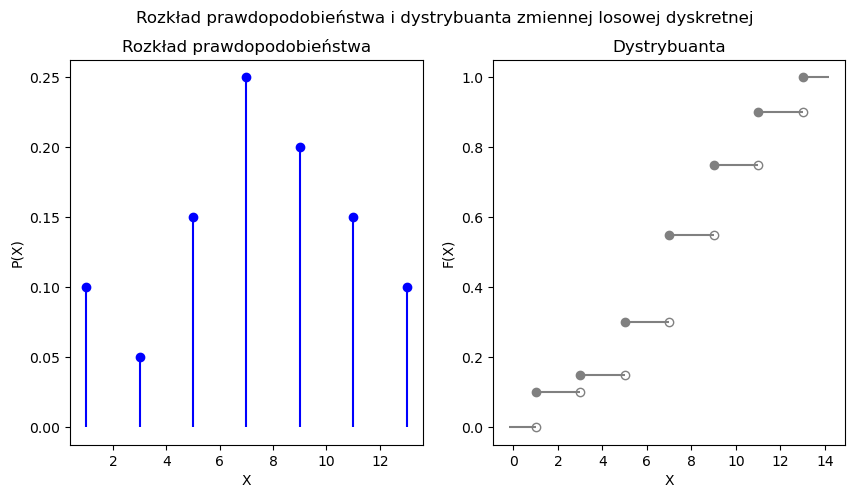

In [8]:
vizualize_discrete_distribution(r1p, r1f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja (`r1_var`) i odchylenie standardowe (`r1_std`).

In [9]:
r1_mean = np.sum(r1p.index * r1p['P(X)'])
r1_mean

7.499999999999999

In [10]:
r1_var = np.sum((r1p.index - r1_mean)**2*r1p['P(X)'])
r1_var

11.55

In [11]:
r1_std = r1_var ** 0.5
r1_std

3.398529093593286

In [12]:
# Komórka testowa
assert np.isclose(r1_mean, 7.499999999999999)
assert np.isclose(r1_var, 11.55)
assert np.isclose(r1_std, 3.398529093593286)

### Zadanie 2: Rozkład dwumianowy [10 pkt]

Zmienna losowa Y ma rozkład dwumianowy z prawdopodobieństwem sukcesu $p=0.5$ i liczbą doświadczeń $n=10$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> Y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny:</br>
> P(Y) - prawdopodobieństwo poszczególnych wariantów.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [13]:
y = np.linspace(0, 10, 11)
p = sp.stats.binom.pmf(p=0.5, n=10, k=y)
r2p = pd.DataFrame(data=p, index=y, columns=['P(Y)'])
r2p.index.name = 'Y'
r2p

,P(Y)
Y,
0.0,0.000977
1.0,0.009766
2.0,0.043945
3.0,0.117188
4.0,0.205078
5.0,0.246094
6.0,0.205078
7.0,0.117187
8.0,0.043945


In [14]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (11, 1)
assert list(r2p.columns) == ["P(Y)"]
assert r2p.index.name == 'Y'
assert np.isclose(np.sum(r2p.index.values), 55)
assert np.isclose(np.sum(r2p["P(Y)"]), 1.0)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
>  Y - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Y) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [15]:
breaks = np.hstack([-np.inf, r2p.index, np.inf])
interv = pd.IntervalIndex.from_breaks(breaks, closed = "left")

rr = sp.stats.binom.cdf(k=y,n=10,p=0.5)
rr = np.hstack([0,rr])
r2f = pd.DataFrame(data = rr, index = interv, columns=["F(Y)"])
r2f.index.name = "Y"
r2f

,F(Y)
Y,
"[-inf, 0.0)",0.000000
"[0.0, 1.0)",0.000977
"[1.0, 2.0)",0.010742
"[2.0, 3.0)",0.054688
"[3.0, 4.0)",0.171875
"[4.0, 5.0)",0.376953
"[5.0, 6.0)",0.623047
"[6.0, 7.0)",0.828125
"[7.0, 8.0)",0.945312


In [16]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (12, 1)
assert list(r2f.columns) == ["F(Y)"]
assert r2f.index.name == 'Y'
assert type(r2f.index) == pd.core.indexes.interval.IntervalIndex
assert r2f.index.closed == 'left'
assert np.isclose(r2f["F(Y)"].min(), 0.0)
assert np.isclose(r2f["F(Y)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

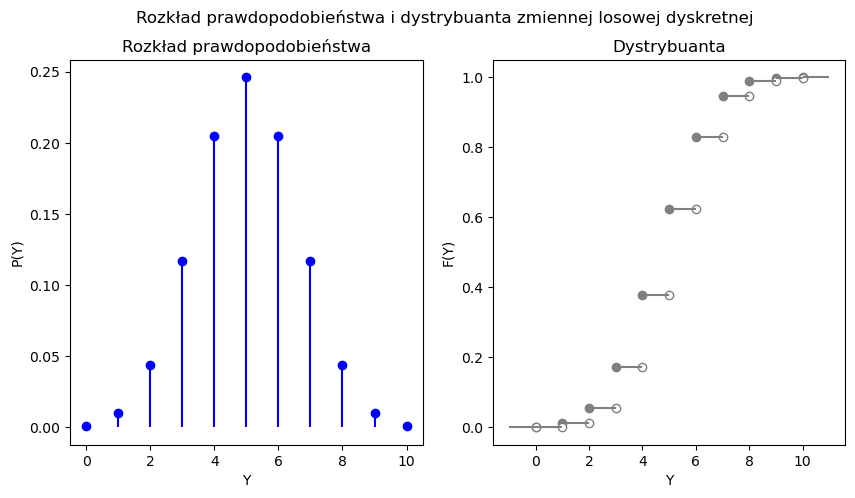

In [17]:
vizualize_discrete_distribution(r2p, r2f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [18]:
r2_mean = np.sum(r2p.index*r2p['P(Y)'])
r2_mean

4.999999999999999

In [19]:
r2_var = np.sum((r2p.index - r2_mean)**2*r2p['P(Y)'])
r2_var

2.5000000000000004

In [20]:
r2_std = r2_var ** 0.5
r2_std

1.5811388300841898

In [21]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 2.5)
assert np.isclose(r2_std, 1.5811388300841898)

### Zadanie 3: Rozkład Poissona [10 pkt]

Zmienna losowa Z ma rozkład Poissona z parametrem $\lambda=15$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> Z - warianty przyjmowane przez zmienną Z.</br>

> Kolumny:</br>
> P(Z) - prawdopodobieństwo poszczególnych wariantów.

W tablicy zawrzyj tylko warianty zmiennej losowej Z od 0 do wartości przy której suma prawdopodobieństw uwzględnionych wariantów przekracza 0.9999.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [22]:
z = np.linspace(0, sp.stats.poisson.ppf(0.9999, mu=15), 32)
p = sp.stats.poisson.pmf(k=z, mu=15)
r3p = pd.DataFrame(data=p, index=z, columns=['P(Z)'])
r3p.index.name = 'Z'

In [23]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (32, 1)
assert list(r3p.columns) == ["P(Z)"]
assert r3p.index.name == 'Z'
assert np.isclose(np.sum(r3p.index.values), 496)
assert np.isclose(np.sum(r3p["P(Z)"]), 0.9999)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> Z - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Z) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [24]:
breaks = np.hstack([-np.inf, r3p.index, np.inf])
intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_cum_prob = np.cumsum(r3p["P(Z)"].values)
r_cum_prob = np.hstack([0, r_cum_prob])
r3f = pd.DataFrame(data=r_cum_prob, index=intervals, columns=["F(Z)"])
r3f.index.name='Z'

In [25]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (33, 1)
assert list(r3f.columns) == ["F(Z)"]
assert r3f.index.name == 'Z'
assert type(r3f.index) == pd.core.indexes.interval.IntervalIndex
assert r3f.index.closed == 'left'
assert np.isclose(r3f["F(Z)"].min(), 0.0)
assert np.isclose(r3f["F(Z)"].max(), 0.9999)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

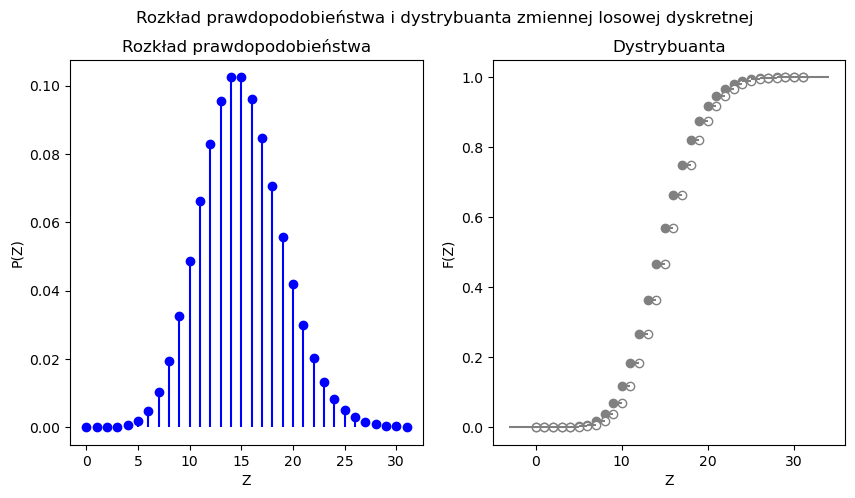

In [26]:
vizualize_discrete_distribution(r3p, r3f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [27]:
r3_mean = sp.stats.poisson.mean(15)
r3_mean

15.0

In [28]:
r3_var = sp.stats.poisson.var(15)
r3_var

15.0

In [29]:
r3_std = sp.stats.poisson.std(15)
r3_std

3.872983346207417

In [30]:
# Komórka testowa
assert np.isclose(r3_mean, 15.0)
assert np.isclose(r3_var, 15.0)
assert np.isclose(r3_std, 3.872983346207417)

### Zadanie 4: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>5)
- P(1<Y<=6)
- P(Z<=12 | Z>21)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_discrete_distribution()`.

#### a) P(X>5)

In [31]:
temp = r1p.index>5
p1 = np.sum(r1p[temp]['P(X)'])

In [32]:
# Komórka testowa
assert np.isclose(p1, 0.7)

#### b) P(1<Y<=6)

In [33]:
p2 = (r2p.index > 1) & (r2p.index <=6)
p2 = np.sum(r2p[p2]['P(Y)'])

In [34]:
# Komórka testowa
assert np.isclose(p2, 0.8173828125)

#### c) P(Z<=12 | Z>21)

In [35]:
p3 = (r3p.index<=12) | (r3p.index>21)
p3 = np.sum(r3p[p3]['P(Z)'])
p3

0.320627128243437

In [36]:
# Komórka testowa
assert np.isclose(p3, 0.32071743985184814)

AssertionError: 